<a href="https://colab.research.google.com/github/akshayabhale1406/SCLR_Jamboree_Education_Linear_Regression/blob/main/Jamboree_Education_Linear_Regression.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [91]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.preprocessing import MinMaxScaler

import statsmodels.api as sm


In [52]:
df = pd.read_csv("/content/sample_data/Jamboree_Admission.csv")

In [53]:
df.head()

,Serial No.,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research,Chance of Admit
0,1,337,118,4,4.5,4.5,9.65,1,0.92
1,2,324,107,4,4.0,4.5,8.87,1,0.76
2,3,316,104,3,3.0,3.5,8.00,1,0.72
3,4,322,110,3,3.5,2.5,8.67,1,0.80
4,5,314,103,2,2.0,3.0,8.21,0,0.65


In [54]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 9 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Serial No.         500 non-null    int64  
 1   GRE Score          500 non-null    int64  
 2   TOEFL Score        500 non-null    int64  
 3   University Rating  500 non-null    int64  
 4   SOP                500 non-null    float64
 5   LOR                500 non-null    float64
 6   CGPA               500 non-null    float64
 7   Research           500 non-null    int64  
 8   Chance of Admit    500 non-null    float64
dtypes: float64(4), int64(5)
memory usage: 35.3 KB


In [55]:
df.describe()

,Serial No.,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research,Chance of Admit
count,500.000000,500.000000,500.000000,500.000000,500.000000,500.00000,500.000000,500.000000,500.00000
mean,250.500000,316.472000,107.192000,3.114000,3.374000,3.48400,8.576440,0.560000,0.72174
std,144.481833,11.295148,6.081868,1.143512,0.991004,0.92545,0.604813,0.496884,0.14114
min,1.000000,290.000000,92.000000,1.000000,1.000000,1.00000,6.800000,0.000000,0.34000
25%,125.750000,308.000000,103.000000,2.000000,2.500000,3.00000,8.127500,0.000000,0.63000
50%,250.500000,317.000000,107.000000,3.000000,3.500000,3.50000,8.560000,1.000000,0.72000
75%,375.250000,325.000000,112.000000,4.000000,4.000000,4.00000,9.040000,1.000000,0.82000
max,500.000000,340.000000,120.000000,5.000000,5.000000,5.00000,9.920000,1.000000,0.97000


In [56]:
df_non_serial = df.drop(["Serial No."], axis = 1)
df_box_plot = df.iloc[:, 1:7]

In [57]:
score_columns = ["GRE Score", "TOEFL Score", "CGPA"]
rating_columns = ["University Rating", "SOP", "LOR", "Research"]

### Univariate Analysis

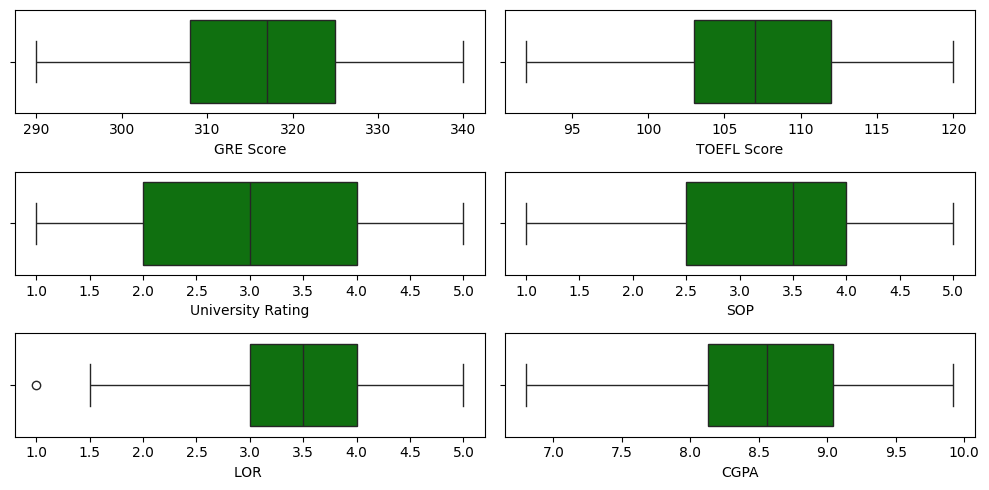

In [58]:
def box_plot_of_columns (dfa):
     fig, axs = plt.subplots(3, 2, figsize = (10, 5))
     ax_index = 0
     for column in dfa:
       row = ax_index // 2
       col = ax_index % 2
       sns.boxplot(dfa[column], orient = "h", color = "green", ax=axs[row, col])
       ax_index += 1
       plt.tight_layout()
     plt.show()
box_plot_of_columns(df_box_plot)

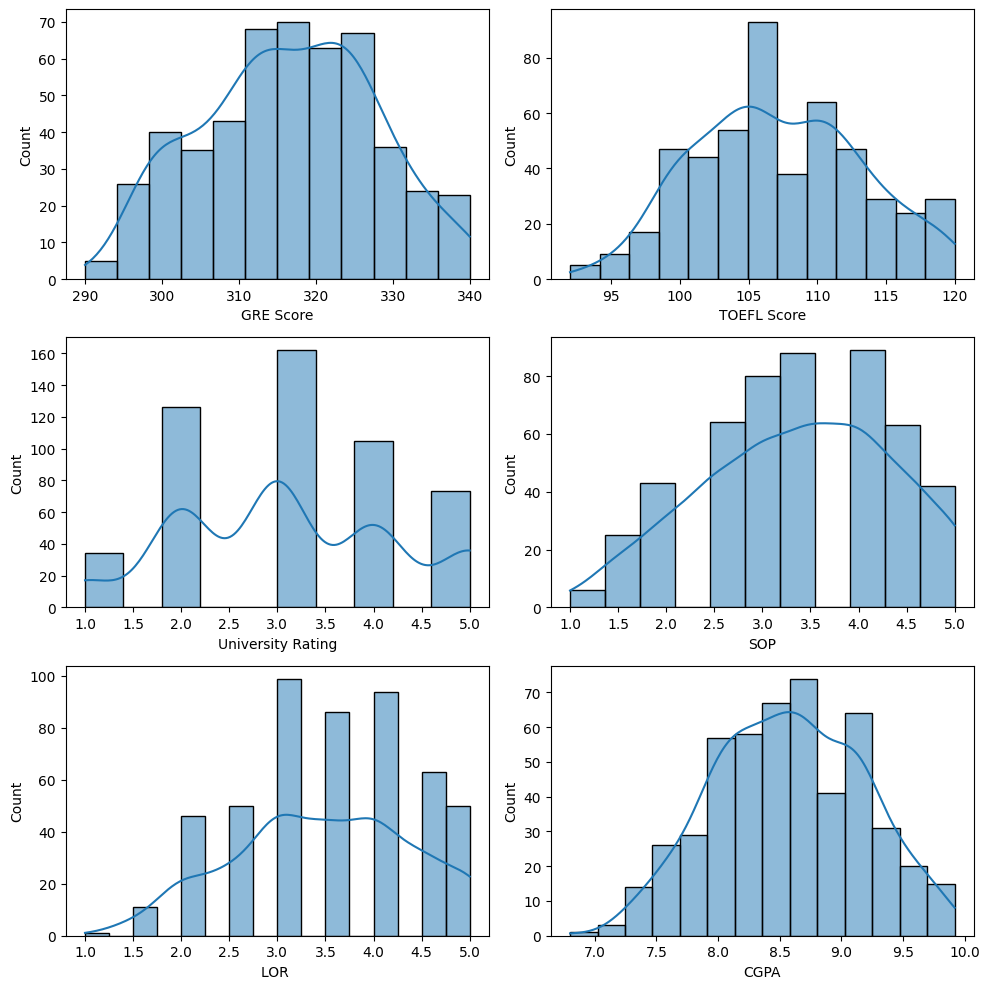

In [59]:
def hist_plot_of_columns (dfa):
     fig, axs = plt.subplots(3, 2, figsize = (10, 10))
     ax_index = 0
     for column in dfa:
       row = ax_index // 2
       col = ax_index % 2
       sns.histplot(dfa[column], ax=axs[row, col], kde = True)
       ax_index += 1
       plt.tight_layout()
     plt.show()
hist_plot_of_columns(df_box_plot)

### Bivariate Analysis

In [60]:
score_columns = ["GRE Score", "TOEFL Score", "CGPA"]
rating_columns = ["University Rating", "SOP", "LOR", "Research"]

In [61]:
df_scatter_plot = df_non_serial[["GRE Score", "TOEFL Score", "CGPA", "University Rating", "SOP", "LOR ", "Chance of Admit "]]
df_scatter_plot

,GRE Score,TOEFL Score,CGPA,University Rating,SOP,LOR,Chance of Admit
0,337,118,9.65,4,4.5,4.5,0.92
1,324,107,8.87,4,4.0,4.5,0.76
2,316,104,8.00,3,3.0,3.5,0.72
3,322,110,8.67,3,3.5,2.5,0.80
4,314,103,8.21,2,2.0,3.0,0.65
...,...,...,...,...,...,...,...
495,332,108,9.02,5,4.5,4.0,0.87
496,337,117,9.87,5,5.0,5.0,0.96
497,330,120,9.56,5,4.5,5.0,0.93
498,312,103,8.43,4,4.0,5.0,0.73


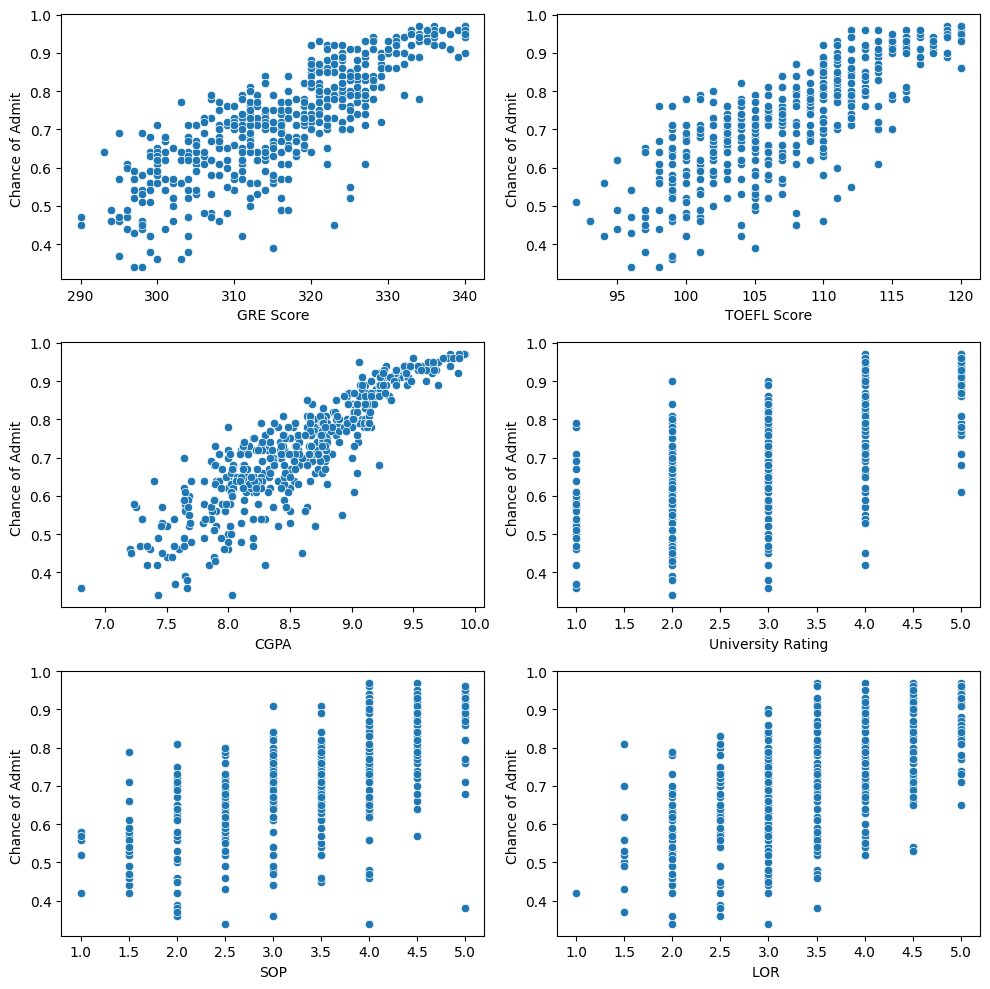

In [62]:
df_scatter_plot = df_non_serial[["GRE Score", "TOEFL Score", "CGPA", "University Rating", "SOP", "LOR ", "Chance of Admit "]]
df_scatter_plot_x_axis = df_scatter_plot.drop(columns = ["Chance of Admit "])
df_scatter_plot_y_axis = df_scatter_plot["Chance of Admit "]

def scatter_plot_of_columns (dfa, y_axis):
     fig, axs = plt.subplots(3, 2, figsize = (10, 10))
     ax_index = 0
     for column in dfa:
       row = ax_index // 2
       col = ax_index % 2
       sns.scatterplot(x = dfa[column], y = y_axis, data = dfa, ax=axs[row, col])
       ax_index += 1
       plt.tight_layout()
     plt.show()
scatter_plot_of_columns(df_scatter_plot_x_axis, df_scatter_plot_y_axis)

In [63]:
df_pair_plot_column = df[score_columns]
df_pair_plot_column["Chance of Admit "] = df["Chance of Admit "]

<ipython-input-63-e847c582376b>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_pair_plot_column["Chance of Admit "] = df["Chance of Admit "]


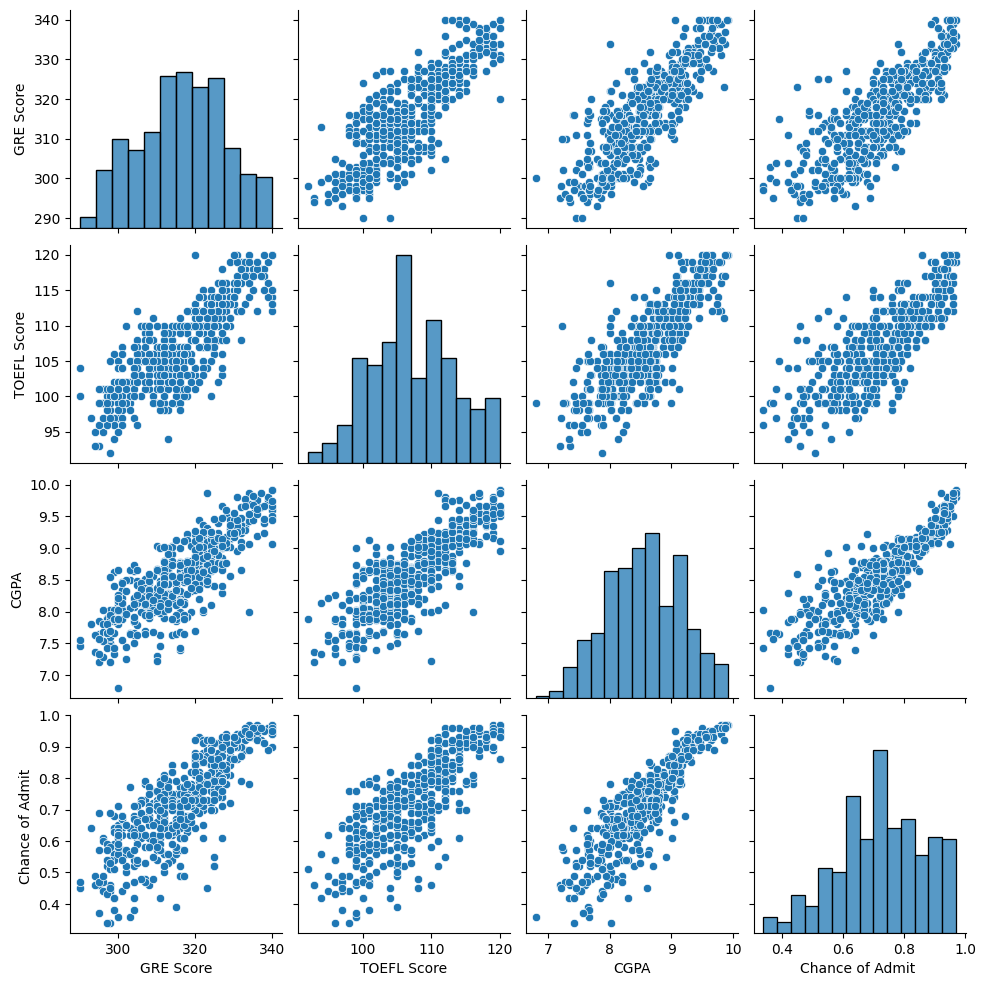

In [64]:
def pair_plot_of_columns (dfa):
     sns.pairplot(dfa)
pair_plot_of_columns(df_pair_plot_column)

### Multivariate Analysis of the data

<Axes: >

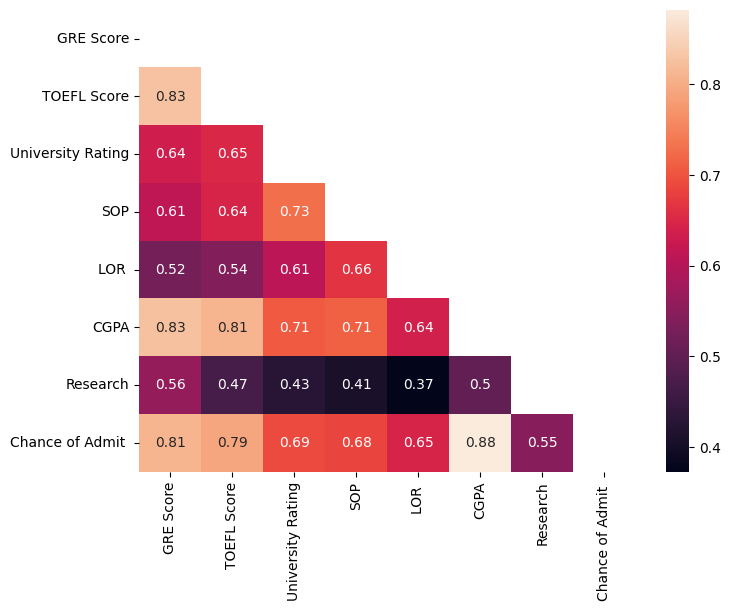

In [65]:
corr = df_non_serial.corr()
matrix = np.triu(corr)
plt.figure(figsize = (8, 6))
sns.heatmap(corr, annot = True, mask=matrix)

In [66]:
df_duplicate_check = df.duplicated(keep = False)
df_duplicate_check.value_counts()

,count
False,500


In [67]:
df_new_feature = df.copy()

In [68]:
def admit_possibility_indicator(dfb):
  if dfb["Chance of Admit "] >= 0.9:
    return "High"
  elif 0.9 > dfb["Chance of Admit "] > 0.7:
    return "Medium"
  else:
    return "Low"

df_new_feature['Admission_Possibility'] = df_new_feature.apply(admit_possibility_indicator, axis=1)

df_new_feature.head()

,Serial No.,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research,Chance of Admit,Admission_Possibility
0,1,337,118,4,4.5,4.5,9.65,1,0.92,High
1,2,324,107,4,4.0,4.5,8.87,1,0.76,Medium
2,3,316,104,3,3.0,3.5,8.00,1,0.72,Medium
3,4,322,110,3,3.5,2.5,8.67,1,0.80,Medium
4,5,314,103,2,2.0,3.0,8.21,0,0.65,Low


In [69]:
df["University Rating"].value_counts()

,count
University Rating,
3,162
2,126
4,105
5,73
1,34


In [70]:
scaler = MinMaxScaler()

In [71]:
df_scaled = scaler.fit_transform(df_non_serial)
df_scaled = pd.DataFrame(df_scaled, columns = df_non_serial.columns)
df_scaled.head()

,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research,Chance of Admit
0,0.94,0.928571,0.75,0.875,0.875,0.913462,1.0,0.920635
1,0.68,0.535714,0.75,0.750,0.875,0.663462,1.0,0.666667
2,0.52,0.428571,0.50,0.500,0.625,0.384615,1.0,0.603175
3,0.64,0.642857,0.50,0.625,0.375,0.599359,1.0,0.730159
4,0.48,0.392857,0.25,0.250,0.500,0.451923,0.0,0.492063


In [72]:
df_x = df_scaled.drop(columns = ["Chance of Admit "])
df_x

,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research
0,0.94,0.928571,0.75,0.875,0.875,0.913462,1.0
1,0.68,0.535714,0.75,0.750,0.875,0.663462,1.0
2,0.52,0.428571,0.50,0.500,0.625,0.384615,1.0
3,0.64,0.642857,0.50,0.625,0.375,0.599359,1.0
4,0.48,0.392857,0.25,0.250,0.500,0.451923,0.0
...,...,...,...,...,...,...,...
495,0.84,0.571429,1.00,0.875,0.750,0.711538,1.0
496,0.94,0.892857,1.00,1.000,1.000,0.983974,1.0
497,0.80,1.000000,1.00,0.875,1.000,0.884615,1.0
498,0.44,0.392857,0.75,0.750,1.000,0.522436,0.0


In [73]:
df_y = df["Chance of Admit "]
df_y

,Chance of Admit
0,0.92
1,0.76
2,0.72
3,0.80
4,0.65
...,...
495,0.87
496,0.96
497,0.93
498,0.73


In [80]:
x_train, x_test, y_train, y_test = train_test_split(df_x, df_y, test_size = 0.2, random_state = 10)

In [81]:
x_train

,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research
305,0.62,0.607143,0.50,0.625,0.625,0.641026,1.0
107,0.96,0.892857,0.75,0.625,0.875,0.852564,1.0
350,0.56,0.535714,0.50,0.500,0.625,0.471154,1.0
334,0.44,0.535714,0.75,0.875,0.750,0.592949,1.0
142,0.82,0.821429,1.00,0.750,0.625,0.846154,1.0
...,...,...,...,...,...,...,...
320,0.54,0.500000,0.50,0.750,0.625,0.544872,1.0
15,0.48,0.464286,0.50,0.625,0.375,0.480769,0.0
484,0.54,0.500000,0.50,0.625,0.500,0.349359,1.0
125,0.20,0.285714,0.50,0.250,0.500,0.596154,1.0


In [82]:
x_test

,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research
151,0.84,0.857143,1.00,1.000,1.000,0.794872,1.0
424,0.70,0.785714,1.00,0.750,1.000,0.852564,1.0
154,0.72,0.571429,0.50,0.500,0.625,0.669872,0.0
190,0.68,0.678571,1.00,0.875,0.750,0.756410,1.0
131,0.26,0.464286,1.00,1.000,0.875,0.592949,0.0
...,...,...,...,...,...,...,...
50,0.46,0.214286,0.50,0.375,0.875,0.480769,1.0
264,0.70,0.642857,0.25,0.500,0.375,0.628205,1.0
34,0.82,0.714286,1.00,0.750,1.000,0.961538,1.0
78,0.12,0.107143,0.25,0.500,0.250,0.237179,1.0


In [83]:
y_train

,Chance of Admit
305,0.74
107,0.91
350,0.74
334,0.73
142,0.92
...,...
320,0.75
15,0.54
484,0.73
125,0.64


In [84]:
y_test

,Chance of Admit
151,0.94
424,0.91
154,0.80
190,0.90
131,0.77
...,...
50,0.76
264,0.75
34,0.94
78,0.44


In [93]:
x_sm = sm.add_constant(x_train)

model = sm.OLS(y_train, x_sm)

results = model.fit()

print(results.summary())

                            OLS Regression Results                            
Dep. Variable:       Chance of Admit    R-squared:                       0.826
Model:                            OLS   Adj. R-squared:                  0.822
Method:                 Least Squares   F-statistic:                     265.1
Date:                Tue, 17 Dec 2024   Prob (F-statistic):          2.29e-144
Time:                        18:37:55   Log-Likelihood:                 559.41
No. Observations:                 400   AIC:                            -1103.
Df Residuals:                     392   BIC:                            -1071.
Df Model:                           7                                         
Covariance Type:            nonrobust                                         
                        coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------
const                 0.3492      0.01

In [94]:
results.predict(x_sm)

,0
305,0.772116
107,0.924328
350,0.696509
334,0.748185
142,0.894759
...,...
320,0.725140
15,0.652871
484,0.643473
125,0.672823
